# Decision Tree & Ensemble Learning

Classification And Regression Trees (CART for short) is a term introduced by [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman) to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Implement various ways to calculate impurity which is used to split data in constructing the decision trees and apply the Decision Tree and ensemble learning algorithms to solve two real-world problems: a classification one and a regression one. 


In [ ]:
# import packages
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
# make this notebook's output stable across runs
np.random.seed(0)

## Gini impurity and Entropy


#### Gini impurity

The CART algorithm recursively splits the training set into two subsets using a single feature k and a threshold $t_k$. The best feature and threshold are chosen to produce the purest subsets weighted by their size. **Gini impurity** measures the impurity of the data points in a set and is used to evaluate how good a split is when the CART algorithm searches for the best pair of feature and the threshold.

To compute Gini impurity for a set of items with J classes, suppose $i \in \{1, 2, \dots, J\}$ and let $p_i$ be the fraction of items labeled with class i in the set.
\begin{align}
I(p) = 1 - \sum_{i=1}^J p_i^2
\end{align}

The following function calculates the gini impurity for a given set of data points.

In [ ]:
def gini_impurity(x):
    """
    This function calculate the Gini impurity for a given set of data points.

    Args:
    x: a numpy ndarray
    """
    unique, counts = np.unique(x, return_counts=True)
    probabilities = counts / sum(counts)
    gini = 1 - sum([p*p for p in probabilities])

    return gini

In [ ]:
np.testing.assert_equal(0, gini_impurity(np.array([1, 1, 1])))
np.testing.assert_equal(0.5, gini_impurity(np.array([1, 0, 1, 0])))
np.testing.assert_equal(3/4, gini_impurity(np.array(['a', 'b', 'c', 'd'])))
np.testing.assert_almost_equal(2.0/3, gini_impurity(np.array([1, 2, 3, 1, 2, 3])))

#### Entropy

Another popular measure of impurity is called **entropy**, which measures the average information content of a message. Entropy is zero when all messages are identical. When it applied to CART, a set's entropy is zero when it contains instances of only one class. Entropy is calculated as follows:
\begin{align}
I(p) = - \sum_{i=1}^J p_i log_2{p_i}
\end{align}

<span style="color:orange"> Implement the entropy function.**

In [ ]:
def entropy(x):
    """
    TODO: This function calculate the entropy of an array.

    Args:
    x: a numpy ndarray
    """
    e = 0 # TODO

    unique, counts = np.unique(x, return_counts=True)
  
    probabilities = counts / sum(counts)
    #e = - sum([p*math.log2(p) for p in probabilities])

    for p in probabilities:
        e += -p * math.log2(p)

    return e

In [ ]:
np.testing.assert_equal(0.0, entropy(np.array([1, 1,1])))
np.testing.assert_equal(1.0, entropy(np.array([1, 0, 1, 0])))
np.testing.assert_equal(2.0, entropy(np.array(['a', 'b', 'c', 'd'])))
np.testing.assert_almost_equal(1.58496, entropy(np.array([1, 2, 3, 1, 2, 3])), 4)

---

## Iris dataset

The Iris data set contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each observation (see image below):
- Sepal.Length: sepal length in centimeters.
- Sepal.Width: sepal width in centimeters.
- Petal.Length: petal length in centimeters.
- Petal.Width: petal width in centimeters.

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
  <tr>
    <td>Iris setosa</td>
    <td>Iris versicolor</td>
    <td>Iris virginica</td>
  </tr>
</table>


In [ ]:
# load the iris train and test data from CSV files
train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_test.csv')

train_x = train.iloc[:,0:4]
train_y = train.iloc[:,4]

test_x = test.iloc[:,0:4]
test_y = test.iloc[:,4]

# print the number of instances in each class
print(train_y.value_counts().sort_index())
print(test_y.value_counts().sort_index())

Iris-setosa        34
Iris-versicolor    32
Iris-virginica     39
Name: species, dtype: int64
Iris-setosa        16
Iris-versicolor    18
Iris-virginica     11
Name: species, dtype: int64


### Decision Tree Classifier

<span style="color:orange">**Apply the Decision Tree classifier to classify the Iris flower data.**

#### Train and visualize a simple Decision Tree

<span style="color:orange">**Build a Decision tree with max_depth of 2.**

In [ ]:
# TODO: read the scikit-learn doc on DecisionTreeClassifier and train a Decision Tree with max depth of 2
# model initialization
dtc = DecisionTreeClassifier(max_depth=2)

# train the model
dtc.fit(train_x, train_y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now let's visualize the decision tree we just trained on the iris dataset and see how it makes predictions.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


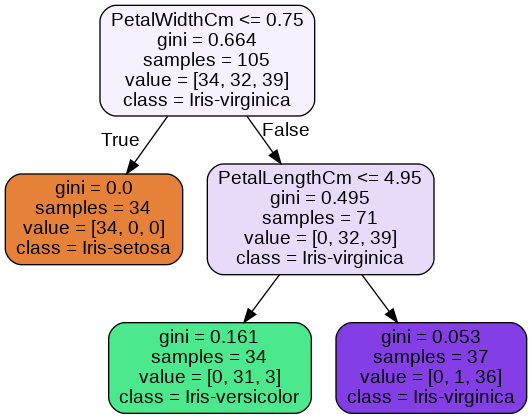

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique()
class_names.sort()
export_graphviz(dtc, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision trees are easy to inteprete and is often referred to as *whitebox* machine learning algorithm. Let's see how this decision tree represented above makes predictions. Suppose you find an iris flower and want to classify it into setosa, versicolor or virginica. You start at the root node (the very top node in the tree). In this node, we check if the flower's patel length is smaller than or equal to 2.35 cm. If it is, we move to the left child and predict setosa to be its class. Otherwise, we move to the right child node. Then similarly we check if the petal length is smaller than or equal to 4.95 cm. If it is, we move to its left child node and predict versicolor to be its class. Otherwise, we move to its right child and predict virginica to be its class. 

#### Prediction with Decision tree

With this simple decision tree above, we can apply it to make predictions on the test dataset and evaluate its performance.

<span style="color:orange">**Make prediction using the trained decision tree model on the test data.**

In [ ]:
# TODO: use the trained decision tree model to make predictions on the test data and evaluate the model performance.


test_z = dtc.predict(test_x)
#test_z_prob = dtc.predict_proba(test_x)[:,:]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model confusion matrix:\n {}".format(confusion_matrix(test_y, test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))

model accuracy: 0.9111111111111111
model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


#### Hyper-parameters

Hyper-parameter controls the complexity of the decision tree model. For example, the deeper the tree is, the more complex patterns the model will be able to capture. In this exercise, we train the decision trees with increasing number of maximum depth and plot its performance. We should see the accuracy of the training data increase as the tree grows deeper, but the accuracy on the test data might not as the model will eventually start to overfit and does not generalize well on the unseen test data.

<span style="color:orange">**For each value of max_depth, we train a decision tree model and evaluate its accuracy on both train and test data, and plot both accuracies in the figure.**

In [ ]:
# TODO: train the decision tree model with various max_depth, make predictions and evaluate on both train and test data.
# model initialization
dtc = DecisionTreeClassifier(max_depth=3)
# train the model
dtc.fit(train_x, train_y)
# predict on train data 
train_z = dtc.predict(train_x)
train_z_prob = dtc.predict_proba(train_x)[:,1]
# predict on test data
test_z = dtc.predict(test_x)
test_z_prob = dtc.predict_proba(test_x)[:,1]
# calculate model accuracy for train & test data 
print("model accuracy on train data: {}".format(accuracy_score(train_y, train_z)))
print("model accuracy on test data: {}".format(accuracy_score(test_y, test_z)))

model accuracy on train data: 0.9809523809523809
model accuracy on test data: 0.9777777777777777


In [ ]:
# model initialization
dtc = DecisionTreeClassifier(max_depth=4)
# train the model
dtc.fit(train_x, train_y)
# predict on train data 
train_z = dtc.predict(train_x)
train_z = dtc.predict(train_x)
# predict on test data
train_z_prob = dtc.predict_proba(train_x)[:,1]
test_z = dtc.predict(test_x)
test_z_prob = dtc.predict_proba(test_x)[:,1]
# calculate model accuracy for train & test data 
print("model accuracy on train data: {}".format(accuracy_score(train_y, train_z)))
print("model accuracy on test data: {}".format(accuracy_score(test_y, test_z)))

model accuracy on train data: 1.0
model accuracy on test data: 0.9777777777777777


[]

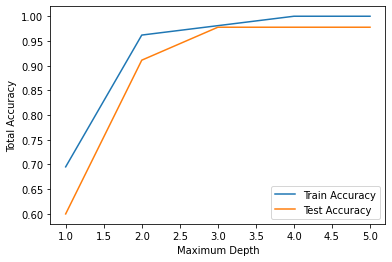

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max_depth_list = [1,2,3,4,5]

train_accuracy = [] # Log training errors for each model
test_accuracy = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=x) 
    dtc.fit(train_x,train_y)
    train_z = dtc.predict(train_x)
    test_z = dtc.predict(test_x)
    train_accuracy.append(accuracy_score(train_y, train_z))
    test_accuracy.append(accuracy_score(test_y, test_z))

x = np.arange(len(max_depth_list)) + 1  # Create domain for plot
plt.plot(x, train_accuracy, label='Train Accuracy') # Plot training accuracy over domain
plt.plot(x, test_accuracy, label='Test Accuracy') # Plot testing accuracy over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.plot() # Show graph


# We can see that the test accuracy stops increasing beyond a max depth of 3 while training accuracy kept increasing until 4 
#and becomes constant after that as the model achieves the max accuracy of 100% on training data.

#### Fine-tune the decision tree classifier

Decision tree is a very powerful model with very few assumptions about the incoming training data (unlike linear models, which assume the data linear), however, it is more likely to overfit the data and won't generalize well to unseen data. To void overfitting, we need to restrict the decision tree's freedom during training via regularization (e.g. max_depth, min_sample_split, max_leaf_nodes and etc.).

To fine-tune the model and combat overfitting, use grid search with cross-validation (with the help of the GridSearchCV class) to find the best hyper-parameter settings for the DecisionTreeClassifier. In particular, we would like to fine-tune the following hyper-parameters:
- **criteria**: this defines how we measure the quality of a split. we can choose either "gini" for the Gini impurity or "entropy" for the information gain.
- **max_depth**: the maximum depth of the tree. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. But meanwhile, deeper trees are more likely to overfit the data. For this practice, we will choose from {1, 2, 3} given there are only 4 features in the iris dataset.
- **min_samples_split**: This value represents the minimum number of samples required to split an internal node. The smaller this value is, the deeper the tree will grow, thus more likely to overfit. On the other hand, if the value is really large (the size of the training data in the extreme case), the tree will be very shallow and could suffer from underfit. In this practice, we choose from {0.01, 0.05, 0.1, 0.2}.

<span style="color:orange">**Use grid search with 3-fold cross-validation to fine-tune the decision tree model and output the best hyper-parameters.**

In [ ]:
# TODO: fine-tune the model, use grid search with 3-fold cross-validation.

parameters = {
    'criterion':['entropy','gini'],
    "max_depth": [1,2,3], 
    "min_samples_split": [.01,0.05, 0.1, 0.2]
}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, parameters, cv=3)
grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(grid.best_score_))
print("The best hyper parameter setting is {}".format(grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.01}


#### Prediction and Evaluation

Now we have a fine-tuned decision tree classifier based on the training data, let's apply this model to make predictions on the test data and evaluate its performance.

In [ ]:
#grid.predict(test_x)
# make prediction and evaluate the model performance on test data
test_z = grid.predict(test_x)
test_z_prob = grid.predict_proba(test_x)[:,:]
test_z_prob

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model confusion matrix:\n {}".format(confusion_matrix(test_y, test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob,multi_class="ovr")))

model accuracy: 0.9777777777777777
model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
model ROC AUC: 0.983473074976343


We see that the model accuracy has improved with the hyperparamter tuning from 91% to 97.7%.

### Random Forest

**Apply Random Forest together with Gridsearch to the Iris dataset and evaluate its accuracy.**

In [ ]:

# TODO: fine-tune Random Forest classifier using grid search with cross-validation (GridSearchCV).
parameters = {
    'criterion':['entropy','gini'],
    "n_estimators": [20, 40],
    "max_depth": [1,2,3], 
    "min_samples_split": [.01,0.05, 0.1,0.2]
}

rfc_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), parameters, cv=3)
rfc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.01, 'n_estimators': 40}


In [ ]:
# TODO: make prediction and evaluate the model performance on test data
test_z = rfc_grid.predict(test_x)
test_z_prob = rfc_grid.predict_proba(test_x)[:,:]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob,multi_class="ovr")))


model accuracy: 0.9555555555555556
model ROC AUC: 0.9936914533864426


Model roc has improved from .98 to .99

### Adaboost

**Apply Adaboost together with Gridsearch to the Iris dataset and evaluate its accuracy.**

In [ ]:
### TODO 
parameters = {
    "n_estimators": [20, 40],
    "learning_rate": [0.01, 0.1, 1, 10]
}

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), random_state=0)
adaboost_grid = GridSearchCV(adaboost, parameters, cv=3)
adaboost_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(adaboost_grid.best_score_))
print("The best hyper parameter setting is {}".format(adaboost_grid.best_params_))


The best score is 0.9619047619047619
The best hyper parameter setting is {'learning_rate': 0.1, 'n_estimators': 20}


In [ ]:
test_z = adaboost_grid.predict(test_x)
test_z_prob = adaboost_grid.predict_proba(test_x)[:,:]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob,multi_class="ovr")))


model accuracy: 0.9777777777777777
model ROC AUC: 0.9936914533864426


Model ROC AUC has further improved from .99 to .9937

### Gradient Boosting

**Apply Boosting together with Gridsearch to the Iris dataset and evaluate its accuracy.**

In [ ]:
### TODO fine-tune Gradient Boosted Trees using grid search with cross-validation (GridSearchCV).
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1],
    "min_samples_split": [0.05, 0.1, 0.2],
    "max_depth":[1,2,3,4],
    "n_estimators":[100]
}

gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
gbc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))



The best score is 0.9619047619047619
The best hyper parameter setting is {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'min_samples_split': 0.05, 'n_estimators': 100}


In [ ]:
# TODO: make prediction and evaluate the model performance on test data
test_z = gbc_grid.predict(test_x)
test_z_prob = gbc_grid.predict_proba(test_x)[:,:]

test_z_prob
print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob,multi_class="ovr")))

model accuracy: 0.9777777777777777
model ROC AUC: 0.9936914533864426


There is no change in accuracy and ROC AUC. Probably because the dataset is very simple.

**Predict the California housing prices using supervised learning models**

## California Housing Dataset

The California Housing dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# Load train and test data from CSV files.
train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/housing_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/housing_test.csv')

train_x = train.iloc[:,0:8]
train_y = train.iloc[:,8]

test_x = test.iloc[:,0:8]
test_y = test.iloc[:,8]



In [ ]:
#check wheather there are any missing values or null
test.isnull().sum()
train.isnull().sum()
#no missing value found

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

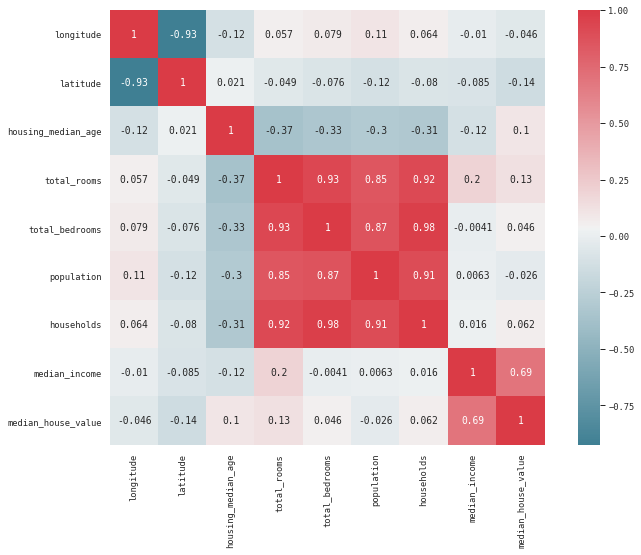

In [ ]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
train_corr_matrix = train.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(train_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );




Median income has the highest positive correlation with the median_house_value

In [ ]:
#Standardize training and test datasets.
#==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the target variables.
#==============================================================================
independent_scaler = StandardScaler()
train_x = independent_scaler.fit_transform(train_x)
test_x = independent_scaler.transform(test_x)
print(train_x[0:9,:])
print("test data")
print(test_x[0:5,:])

[[-0.11131397  0.51396387  1.8562098  -1.15358908 -1.21043117 -1.07186955
  -1.1994956  -1.00030408]
 [-1.3173838   0.99993462  1.14171192 -0.74063681 -0.49877147 -0.51251556
  -0.58083415 -0.84938602]
 [ 0.76084397 -0.82245571 -0.92239307 -0.12873738 -0.33746194 -0.03319355
  -0.35373059  1.28620508]
 [ 0.64123373 -0.73367259 -0.92239307 -0.05572925  1.56029727  1.41434152
   1.3064748  -1.13519966]
 [-0.12128149  0.51396387  1.6974325  -0.85243052 -0.81664613 -0.71259552
  -0.8679766  -0.87043206]
 [ 0.88543796 -0.85516528 -1.39872499  3.60243463  2.56610965  2.59568324
   2.93013479  1.48238799]
 [ 0.8804542  -0.85049248 -1.16055903 -0.65439595 -0.94000048 -0.74217256
  -0.91496354  2.63357449]
 [-0.84392663  1.42983183 -0.92239307  0.58263564  0.23661022  0.3339097
   0.16834658  0.73604686]
 [ 0.95521059 -1.00469474 -1.79566826 -0.45727399 -0.83087933 -0.74217256
  -0.8497039   4.85620523]]
test data
[[ 1.25423617 -1.42524636 -0.5254498  -0.2460067  -0.33034534  0.10947217
  -0.33

In [ ]:
#Perform the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(train_x,train_y)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  are "+str(linearRegModel.coef_))

Intercept is 206824.6245155046
coefficients  are [-85700.02589188 -90565.73473155  14601.5831519  -15915.15169082
  38541.14412214 -42000.86140876  23706.94135369  76367.30144222]


In [ ]:
#predict on the test data
test_z = linearRegModel.predict(test_x)
#calculate rmse for test data
rmse=np.sqrt(mean_squared_error(test_y,test_z))

print("model error: {}".format(rmse))

model error: 70378.20703261041


In [ ]:
print(test_z[0:5])
print(test_y[0:5])

[210889.78468952 279848.24821957 190519.73328147  90404.54665014
 294481.41479892]
0    136900.0
1    241300.0
2    200700.0
3     72500.0
4    460000.0
Name: median_house_value, dtype: float64


In [ ]:
# Build Decision Tree regressor
parameters = {
    "max_depth": [2,4,8,10], 
    "min_samples_split": [.01,0.05, 0.1, 0.2]
}

dtr = DecisionTreeRegressor()
dtr_grid = GridSearchCV(dtr, parameters, cv=3)
dtr_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(dtr_grid.best_score_))
print("The best hyper parameter setting is {}".format(dtr_grid.best_params_))

The best score is 0.6962972916881611
The best hyper parameter setting is {'max_depth': 10, 'min_samples_split': 0.01}


In [ ]:
#make prediction and evaluate the model performance on test data
test_z = dtr_grid.predict(test_x)
rmse=np.sqrt(mean_squared_error(test_y, test_z))

print("model error: {}".format(rmse))

model error: 63080.45386181574


Model error has reduced with decision tree regressor as compared to linear regression.

In [ ]:
#fine-tune Random Forest regressor using grid search with cross-validation (GridSearchCV).
parameters = {
    "n_estimators": [20,40],
    "max_depth": [8,10], 
    "min_samples_split": [.01,0.05,0.1,0.2]
}

rfr_grid = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=0), parameters, cv=3)
rfr_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfr_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfr_grid.best_params_))

The best score is 0.7379489568071637
The best hyper parameter setting is {'max_depth': 10, 'min_samples_split': 0.01, 'n_estimators': 40}


In [ ]:
# make prediction and evaluate the model performance on test data
test_z = rfr_grid.predict(test_x)
rmse=np.sqrt(mean_squared_error(test_y, test_z))

print("model error: {}".format(rmse))



model error: 60102.24722163599


Model error has further reduced with random forest regressor.

In [ ]:
#fine tune adaboost
parameters = {
    "n_estimators": [20,40],
    "learning_rate": [0.01, 0.1, 1, 10]
}

adaboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), random_state=0)
adaboost_grid = GridSearchCV(adaboost, parameters, cv=3)
adaboost_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(adaboost_grid.best_score_))
print("The best hyper parameter setting is {}".format(adaboost_grid.best_params_))

The best score is 0.7966242038033132
The best hyper parameter setting is {'learning_rate': 1, 'n_estimators': 40}


In [ ]:
#make prediction and evaluate the model performance on test data
test_z = adaboost_grid.predict(test_x)
rmse=np.sqrt(mean_squared_error(test_y, test_z))

print("model error: {}".format(rmse))



model error: 51944.31085837195


There is a further improvement in prediction with the adaboost.

In [ ]:
# TODO: fine-tune Gradient Boosted Trees using grid search with cross-validation (GridSearchCV).
parameters = {
    "loss":["ls"],
    "learning_rate": [0.01, 0.1],
    "min_samples_split": [0.01,0.05],
    "max_depth":[8,10],
    "n_estimators":[100]
}

gbr_grid = GridSearchCV(GradientBoostingRegressor(), parameters, cv=3, n_jobs=-1)
gbr_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'min_samples_split': 0.05, 'n_estimators': 100}


In [ ]:
# TODO: make prediction and evaluate the model performance on test data
test_z = gbr_grid.predict(test_x)

rmse=np.sqrt(mean_squared_error(test_y, test_z))

print("model error: {}".format(rmse))

model error: 47939.569449753704


Gradient boosting has reduced the model error significantly.

In [ ]:
# print predicted values
test_z

array([141829.56712913, 244033.29644221, 143822.14195199, ...,
       425675.83069892,  64668.97280066, 266190.22938468])

In [ ]:
#print actual values
test_y

0       136900.0
1       241300.0
2       200700.0
3        72500.0
4       460000.0
          ...   
6187     74000.0
6188    177300.0
6189    351900.0
6190     92500.0
6191    298300.0
Name: median_house_value, Length: 6192, dtype: float64